In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import sklearn.neighbors
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pickle

# 2. Preparing data

<Axes: xlabel='x', ylabel='y'>

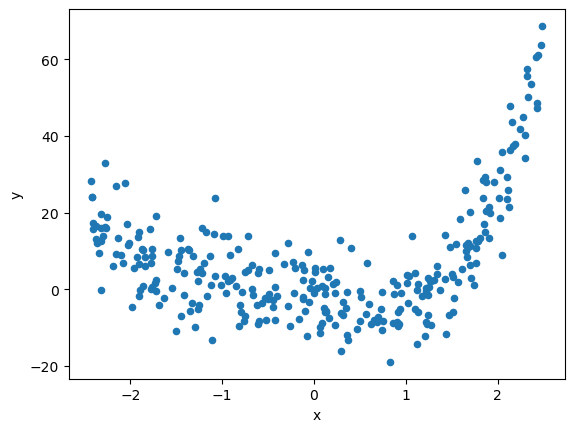

In [3]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv',index=None)
df.plot.scatter(x='x',y='y')

# 3. Regression

# Linear regression

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 1) (240, 1)
(60, 1) (60, 1)


In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_, "\n", lin_reg.predict(X_test))
reg_lin_test = lin_reg.predict(X_test)
reg_lin_train = lin_reg.predict(X_train)

[7.02696365] [[2.69631042]] 
 [[ 3.6465072 ]
 [ 7.02434502]
 [11.99826267]
 [ 7.25635932]
 [ 5.92746436]
 [ 2.22567152]
 [ 6.47784154]
 [ 3.19430023]
 [10.09230403]
 [ 1.73148925]
 [ 5.21796695]
 [ 3.61357869]
 [ 3.84303576]
 [ 2.25991148]
 [ 5.58322879]
 [ 3.20213539]
 [ 5.69146322]
 [ 5.22054565]
 [ 3.35872271]
 [ 3.39515417]
 [ 3.04308184]
 [ 5.88358338]
 [10.88463659]
 [ 4.03596433]
 [ 5.81357678]
 [10.86488474]
 [11.01134834]
 [12.71107201]
 [13.16704626]
 [ 9.56441226]
 [13.23483289]
 [11.64006972]
 [12.74702291]
 [ 9.74629649]
 [ 3.68761785]
 [ 3.88405941]
 [ 3.11592241]
 [ 1.88809946]
 [10.72795983]
 [ 3.48010669]
 [13.31536205]
 [ 7.3319031 ]
 [12.03735505]
 [ 7.38278133]
 [ 4.12698226]
 [11.62109461]
 [11.09431269]
 [ 3.60393593]
 [ 0.51005192]
 [ 0.70516319]
 [12.6931305 ]
 [ 4.84068619]
 [ 0.77420051]
 [ 8.37121976]
 [ 4.49898836]
 [10.32517796]
 [11.46330222]
 [ 4.91616726]
 [10.28330868]
 [12.00026286]]


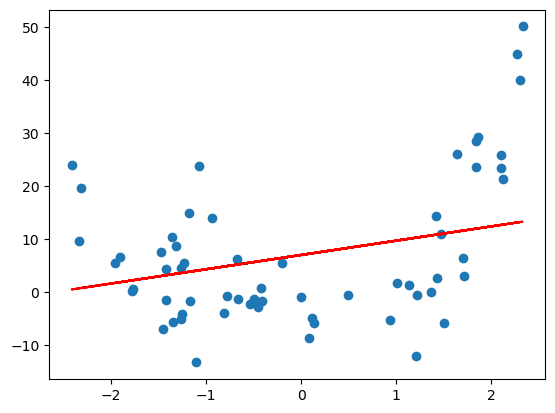

In [6]:
plt.scatter(X_test, y_test)
plt.plot(X_test, reg_lin_test, color='red')
plt.show()

# KNN

In [11]:
# for 3 neighbours
knn_reg3 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn_reg3.fit(X_train, y_train)
knn3_test = knn_reg3.predict(X_test)
knn3_train = knn_reg3.predict(X_train)

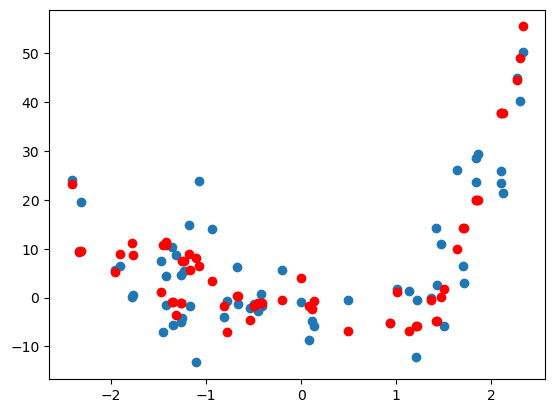

In [8]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, knn3_test, color='red')
plt.show()

In [13]:
# for 5 neighbours
knn_reg5 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=5)
knn_reg5.fit(X_train, y_train)
knn5_test = knn_reg5.predict(X_test)
knn5_train = knn_reg5.predict(X_train)

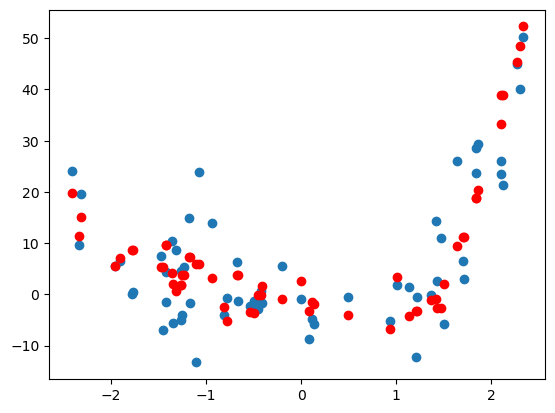

In [14]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, knn5_test, color='red')
plt.show()

# Polynomial regression

In [16]:
# second degree polynomial
poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = poly_features2.fit_transform(X_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train_poly2, y_train)

print(lin_reg2.intercept_, lin_reg2.coef_)
print(lin_reg2.predict(poly_features2.fit_transform([[0],[2]])))

[-5.87767858] [[3.07837323 6.24746829]]
[[-5.87767858]
 [25.26894104]]


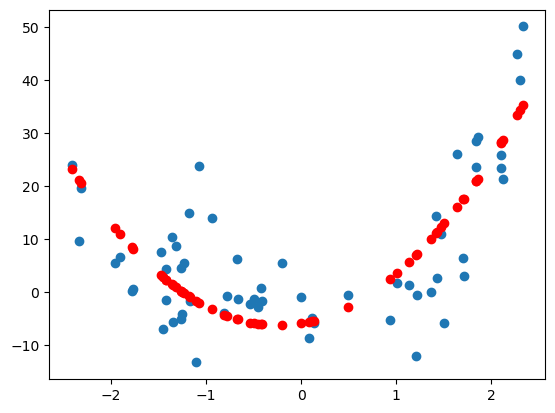

In [17]:
poly2_test = lin_reg2.predict(poly_features2.transform(X_test))
poly2_train = lin_reg2.predict(poly_features2.transform(X_train))

plt.scatter(X_test, y_test)
plt.scatter(X_test, poly2_test, color='red')
plt.show()

In [18]:
# third degree polynomial
poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = poly_features3.fit_transform(X_train)
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train_poly3, y_train)

LinearRegression()

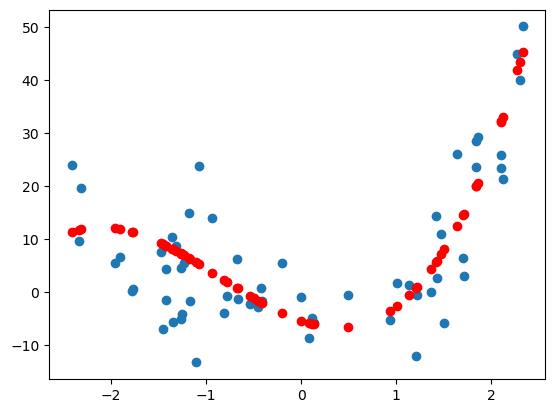

In [19]:
poly3_test = lin_reg3.predict(poly_features3.transform(X_test))
poly3_train = lin_reg3.predict(poly_features3.transform(X_train))

plt.scatter(X_test, y_test)
plt.scatter(X_test, poly3_test, color='red')
plt.show()

In [20]:
# fourth degree polynomial
poly_features4 = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly4 = poly_features4.fit_transform(X_train)
lin_reg4 = LinearRegression()
lin_reg4.fit(X_train_poly4, y_train)

LinearRegression()

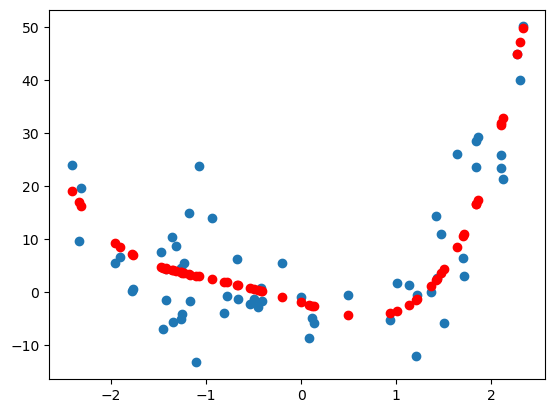

In [21]:
poly4_test = lin_reg4.predict(poly_features4.transform(X_test))
poly4_train = lin_reg4.predict(poly_features4.transform(X_train))

plt.scatter(X_test, y_test)
plt.scatter(X_test, poly4_test, color='red')
plt.show()

In [22]:
# fifth degree polynomial
poly_features5 = PolynomialFeatures(degree=5, include_bias=False)
X_train_poly5 = poly_features5.fit_transform(X_train)
lin_reg5 = LinearRegression()
lin_reg5.fit(X_train_poly5, y_train)

LinearRegression()

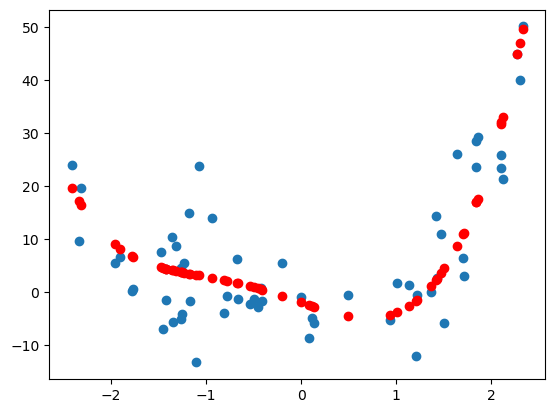

In [23]:
poly5_test = lin_reg5.predict(poly_features5.transform(X_test))
poly5_train = lin_reg5.predict(poly_features5.transform(X_train))

plt.scatter(X_test, y_test)
plt.scatter(X_test, poly5_test, color='red')
plt.show()

# 4. DataFrame with mean square error

In [24]:
data = [[mean_squared_error(y_train, reg_lin_train), mean_squared_error(y_test, reg_lin_test)], 
        [mean_squared_error(y_train, knn3_train), mean_squared_error(y_test, knn3_test)], 
        [mean_squared_error(y_train, knn5_train), mean_squared_error(y_test, knn5_test)], 
        [mean_squared_error(y_train, poly2_train), mean_squared_error(y_test, poly2_test)], 
        [mean_squared_error(y_train, poly3_train), mean_squared_error(y_test, poly3_test)], 
        [mean_squared_error(y_train, poly4_train), mean_squared_error(y_test, poly4_test)], 
        [mean_squared_error(y_train, poly5_train), mean_squared_error(y_test, poly5_test)]]

In [25]:
mse = pd.DataFrame(data, columns=['train_mse', 'test_mse'], 
                   index=['lin_reg', 'knn_3_reg', 'knn_5_reg', 'poly_2_reg', 'poly_3_reg', 'poly_4_reg', 'poly_5_reg'])
print(mse)
with open('mse.pkl', 'wb') as file:
  pickle.dump(mse, file)

             train_mse    test_mse
lin_reg     223.417014  158.288258
knn_3_reg    32.556837   77.617664
knn_5_reg    39.769027   62.720581
poly_2_reg   88.410784   77.067749
poly_3_reg   58.339608   65.828915
poly_4_reg   47.361133   55.753037
poly_5_reg   47.295386   55.343128


# 5. Regressors

In [26]:
regressors = [(lin_reg, None), (knn_reg3, None), (knn_reg5, None), 
              (lin_reg2, poly_features2), (lin_reg3, poly_features3), 
              (lin_reg4, poly_features4), (lin_reg5, poly_features5)]
print(regressors)
with open('reg.pkl', 'wb') as file:
  pickle.dump(regressors, file)

[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
